<a href="https://colab.research.google.com/github/halaabbadi1/Project3-/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Chicago_Crime.csv')
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


In [80]:
df.isna().sum()

,0
ID,0
Date,0
Primary Type,0
Description,0
Location Description,10928
Arrest,0
Domestic,0
Beat,0
District,47
Ward,614846


In [81]:
df = df.drop(columns = 'Ward')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 544.3+ MB


In [82]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Latitude              float64       
 10  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 544.3+ MB


In [84]:
df = df.set_index('Date')

In [85]:
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude
Date,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,41.819538,-87.620020


In [86]:
df = df.interpolate()

<ipython-input-86-22760bab2512>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [87]:
df.isna().sum()

,0
ID,0
Primary Type,0
Description,0
Location Description,10928
Arrest,0
Domestic,0
Beat,0
District,0
Latitude,0
Longitude,0


In [88]:
df['Location Description'] = df['Location Description'].fillna(method='ffill')

<ipython-input-88-6246cad95b07>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Location Description'] = df['Location Description'].fillna(method='ffill')


In [89]:
df.isna().sum().sum()

0

In [90]:
df['year'] = df.index.year

In [91]:
df_2022 = df.loc['2022']
df_2022

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,year
Date,,,,,,,,,,,
2022-01-01 13:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,41.881884,-87.640060,2022
2022-01-01 13:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,41.787923,-87.769446,2022
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,41.687443,-87.604120,2022
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,41.734353,-87.585147,2022
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,41.910818,-87.654560,2022
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,41.855911,-87.719966,2022
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,41.766546,-87.645669,2022
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,41.868829,-87.686098,2022


#Topic 1) Comparing Police Districts

In [92]:
df_2022_gr = df_2022.groupby('District')['Primary Type'].count().reset_index()
df_2022_gr

,District,Primary Type
0,1.0,13044
1,2.0,11793
2,3.0,11937
3,4.0,13931
4,5.0,9773
5,6.0,14694
6,7.0,10319
7,8.0,14805
8,9.0,10376
9,10.0,9961


* Which district had the most crimes in 2022?

In [93]:
most_crimes_district = df_2022_gr[df_2022_gr['Primary Type'] == df_2022_gr['Primary Type'].max()]
most_crimes_district

,District,Primary Type
7,8.0,14805


* Which had the least?

In [94]:
least_crimes_district = df_2022_gr[df_2022_gr['Primary Type'] == df_2022_gr['Primary Type'].min()]
least_crimes_district

,District,Primary Type
22,31.0,15


#Topic 2) Crimes Across the Years:

In [95]:
total_crimes_per_year = df.groupby('year')['Primary Type'].count()
total_crimes_per_year

,Primary Type
year,
2001,485886
2002,486807
2003,475985
2004,469422
2005,453773
2006,448179
2007,437087
2008,427183
2009,392827


* Is the total number of crimes increasing or decreasing across the years?

<Axes: title={'center': 'Total Crimes per Year'}, xlabel='year'>

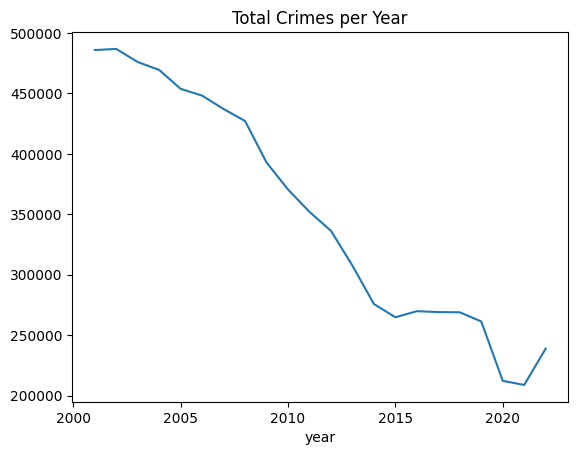

In [96]:
total_crimes_per_year.plot(kind='line', title='Total Crimes per Year')

In [97]:
total_crimes_per_year = df.groupby('Primary Type')['year'].count()
total_crimes_per_year

,year
Primary Type,
ARSON,13121
ASSAULT,501103
BATTERY,1410889
BURGLARY,422246
CONCEALED CARRY LICENSE VIOLATION,1019
CRIM SEXUAL ASSAULT,27584
CRIMINAL DAMAGE,878914
CRIMINAL SEXUAL ASSAULT,6353
CRIMINAL TRESPASS,212869


* Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

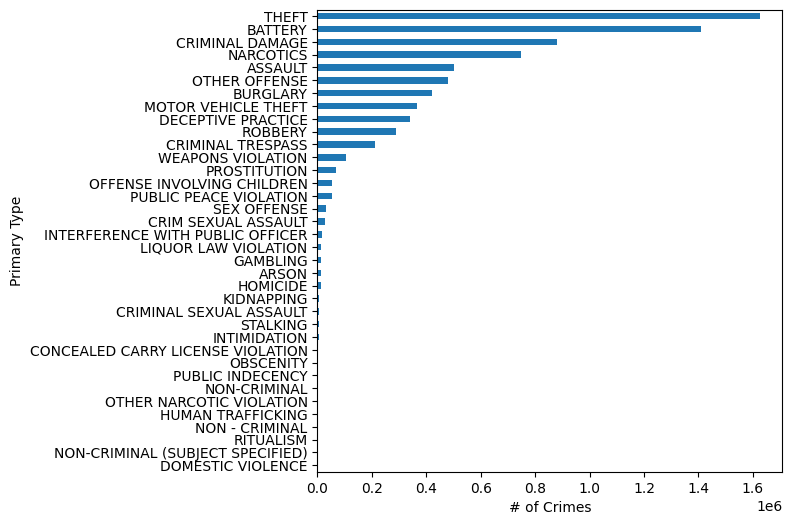

In [98]:
ax = total_crimes_per_year.sort_values().plot(kind = 'barh', figsize = (6,6))
ax.set(xlabel = '# of Crimes');

In [99]:
df['month'] = df.index.month_name()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,year,month
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,41.957850,-87.749185,2001,January
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,41.783892,-87.684841,2001,January
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,41.780412,-87.611970,2001,January
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,42.012391,-87.678032,2001,January
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,41.819538,-87.620020,2001,January


#Topic 4) Comparing Months:

In [100]:
total_crimes_per_month = df.groupby('month')['Primary Type'].count()
total_crimes_per_month

,Primary Type
month,
April,627175
August,710444
December,579768
February,529391
January,601236
July,717232
June,681739
March,629704
May,682932


* What months have the most crime? What months have the least?

In [101]:
most_crimes_month = total_crimes_per_month.idxmax()
most_crimes_month

'July'

In [102]:
least_crimes_month = total_crimes_per_month.idxmin()
least_crimes_month

'February'

* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [103]:
crime_type_by_month = df.groupby(['month', 'Primary Type'])['Primary Type'].count().unstack()
crime_type_by_month

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
month,,,,,,,,,,,,,,,,,,,,,
April,1097.0,42031.0,118500.0,31372.0,78.0,2134.0,75104.0,438.0,17737.0,27702.0,...,41632.0,6034.0,13.0,4341.0,1.0,20907.0,2274.0,392.0,125642.0,8408.0
August,1182.0,46455.0,128734.0,40597.0,96.0,2596.0,81708.0,586.0,18564.0,29192.0,...,41093.0,6284.0,25.0,4397.0,3.0,27395.0,2895.0,406.0,158942.0,9887.0
December,923.0,34324.0,98364.0,35635.0,64.0,1851.0,63130.0,476.0,15804.0,30024.0,...,35110.0,4352.0,13.0,3188.0,3.0,25749.0,1919.0,332.0,126644.0,7401.0
February,807.0,33416.0,93601.0,25652.0,69.0,1896.0,55428.0,435.0,16679.0,25387.0,...,38578.0,5659.0,15.0,3401.0,1.0,17271.0,2019.0,313.0,104948.0,6400.0
January,917.0,34818.0,101302.0,32639.0,62.0,2575.0,62574.0,539.0,18471.0,30291.0,...,42162.0,6383.0,8.0,3499.0,3.0,23412.0,2725.0,378.0,123454.0,7934.0
July,1350.0,47900.0,136817.0,39279.0,95.0,2676.0,83397.0,604.0,18029.0,28540.0,...,41548.0,5875.0,13.0,4721.0,1.0,27243.0,3064.0,429.0,159067.0,9788.0
June,1236.0,47255.0,135905.0,35958.0,92.0,2512.0,78921.0,592.0,17492.0,28276.0,...,40654.0,5574.0,22.0,4976.0,NaN,24407.0,2934.0,419.0,143411.0,9402.0
March,1111.0,41709.0,117869.0,30073.0,77.0,2112.0,71873.0,504.0,18734.0,28648.0,...,43249.0,6141.0,9.0,4669.0,3.0,20190.0,2367.0,399.0,123733.0,8171.0
May,1230.0,48453.0,135678.0,36066.0,96.0,2404.0,79685.0,538.0,18379.0,27554.0,...,42213.0,6089.0,22.0,5493.0,1.0,23707.0,2804.0,396.0,137505.0,9938.0


In [105]:
crime_type_by_month_melted = crime_type_by_month.reset_index().melt(id_vars=['month'], var_name='Primary Type', value_name='Count')

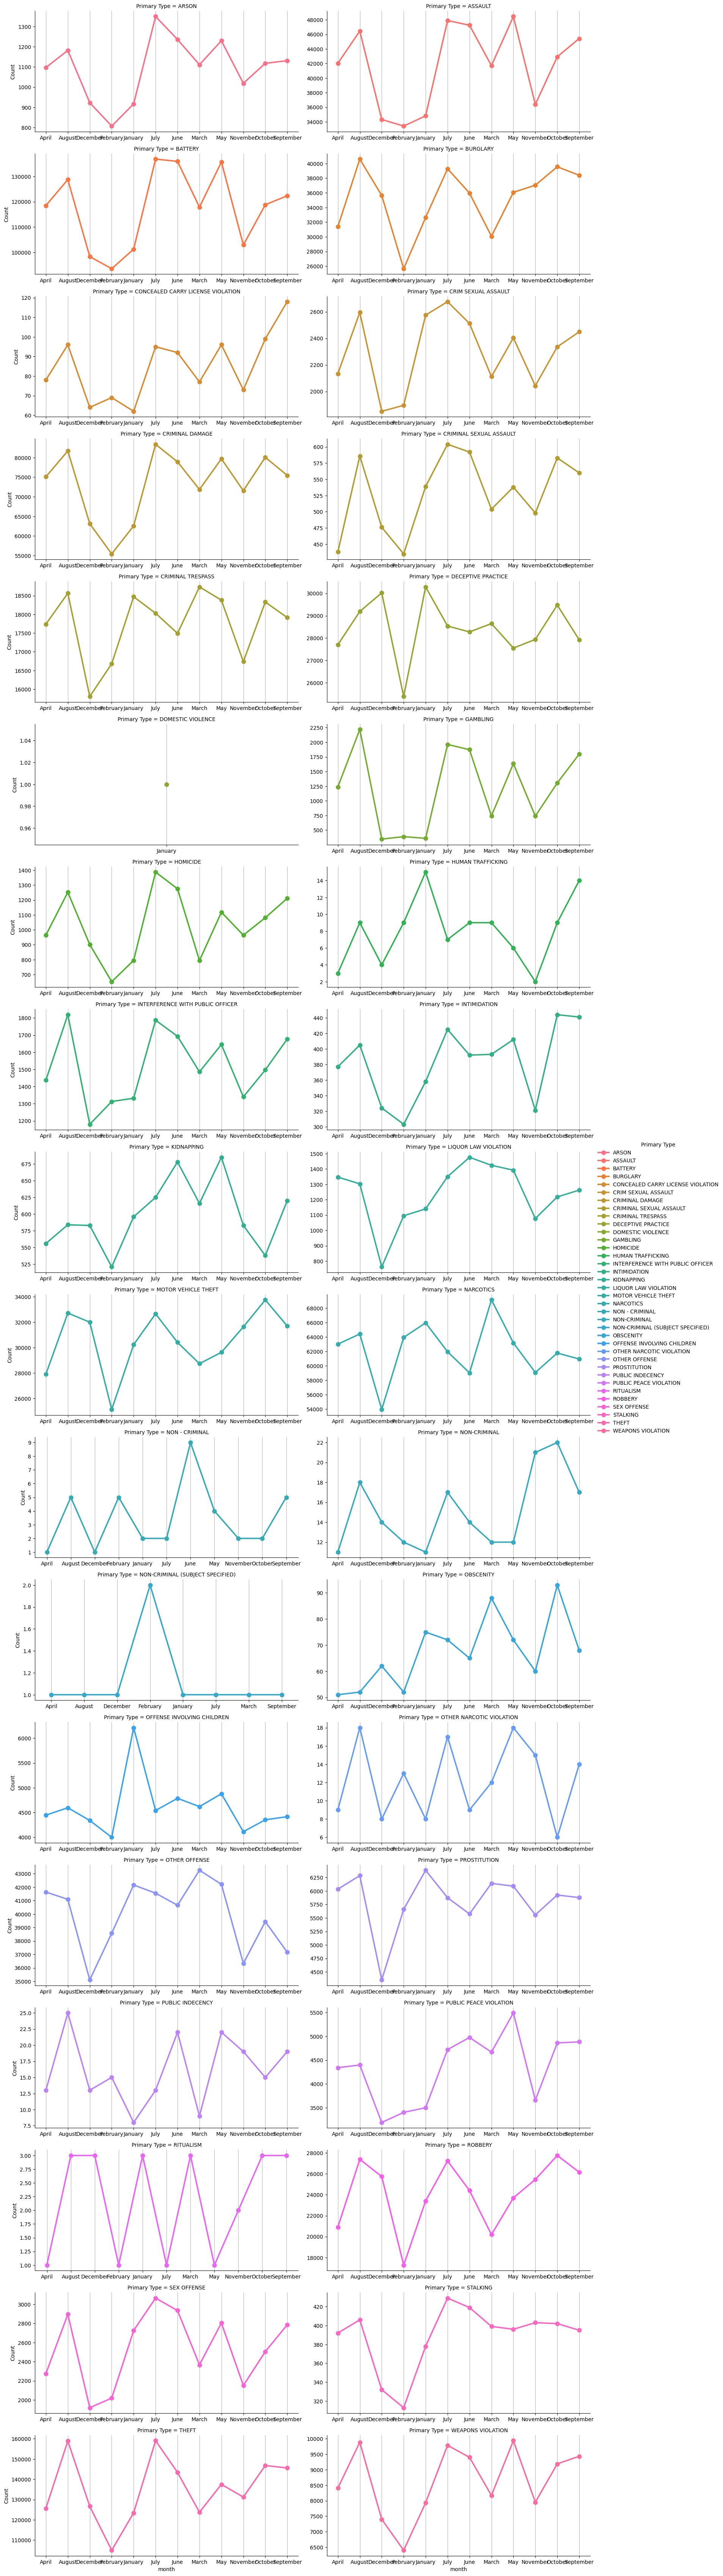

In [106]:
import seaborn as sns
g = sns.catplot(data=crime_type_by_month_melted, x='month', y='Count', hue='Primary Type', kind='point',
                aspect=2, height=4, col='Primary Type', col_wrap=2, sharey=False, sharex=False)
[ax.grid(axis = 'x') for ax in g.axes];